In [43]:
from src.infer_models import infer
from src.preprocess import preprocess
from src.archs_models import *

import os
import sys
import pathlib
from pathlib import Path

import numpy as np
# random number generator
# rng = np.random.default_rng(2021)
from numpy.core.shape_base import block
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans Serif"],
    "text.latex.preamble": r'\usepackage{amsmath,amsthm,amsfonts,amssymb}',
})  # Avant Garde,

np.set_printoptions(precision=4)
np.set_printoptions(formatter={'float': "{:0.4f}".format})


# Ensure path is referenced to this script's root
# thisdir = os.path.dirname(__file__)
thisdir = Path.cwd()
# os.chdir(thisdir)
os.chdir(sys.path[0])
print(os.getcwd())

figs_dir = os.path.join(thisdir, 'figs/')
if not os.path.isdir(figs_dir):
    os.makedirs(figs_dir)

# os.chdir(r'./ai534ias/ia1/')

# Generate the path to the file relative to your python script:
# script_location = Path(__file__).absolute().parent
# print(script_location)
# file_location = script_location / 'file.yaml'
# file = file_location.open()


/home/somefunagba/ias/ia4


In [44]:
# Data Preprocessing

# do major feature engineering - 0 | 1
doengr = 0
donormalize = 0

# Train
rawdata = 'csvs/mushroom-train.csv'
traindata, train_id = preprocess(rawdata, donormalize=donormalize, istrain=1,
                                 traininfo=None, doengr=doengr)

# View final data entering the model.
# print(traindata['X'])

# Dev
rawdata = 'csvs/mushroom-val.csv'
devdata, dev_id = preprocess(rawdata, donormalize=donormalize, istrain=0,
                             traininfo=traindata, doengr=doengr)


data size (rows,columns) (4500, 118)
data size (rows,columns) (1600, 118)


In [45]:
DX = traindata['X']
DY = traindata['Y']
x_names = traindata['feats']
rows, cols = DX.shape

# Toy dataset.
# Format: each row is an example.
# The last column is the label.
# The first two columns are features.
# Feel free to play with it by adding more features & examples.
# Interesting note: I've written this so the 2nd and 5th examples
# have the same features, but different labels - so we can see how the
# tree handles this case.
# training_data = [
#     ['Green', 3, 'Apple'],
#     ['Yellow', 3, 'Apple'],
#     ['Red', 1, 'Grape'],
#     ['Red', 1, 'Grape'],
#     ['Yellow', 3, 'Lemon'],
# ]
# TRAIN
# DX = np.array([[0,0],[1,0],[2,1],[2,1],[1,0]])
# DY = np.array([0,0,1,1,2])
# # TEST
# DXT = np.array([[0,0],[1,2],[2,3],[2,1],[1,0]])
# DYT = np.array([0,0,1,1,2])
# x_names = ["color", "diameter"]


In [46]:
pass
best_splitdec = search_bestsplit(DX, DY, x_names, ent_class, w=None, m=25)
for k in best_splitdec:
    print(k, ":", best_splitdec[k])

pfs = feat_split_dist(DX, DY, x_names)
print(pfs[np.argmax(pfs)])
# print(pfs)
pfs = feat_split_dist(DX, DY, x_names, split_metric=gini_class)
print(pfs[np.argmax(pfs)])
# print(pfs)

pass
best_splitdec = search_bestsplit(DX, DY, x_names, ent_class, w=None, m=25, colw=pfs)
for k in best_splitdec:
    print(k, ":", best_splitdec[k])

name : gill-size=n
id : 10
val : 0
ig : 0.22583671748933176
0.08590892612116012
0.01298064850633397
name : odor=n
id : 6
val : 0
ig : 0.5351367538654915


In [47]:
T = [10,20,30,40,50]
dmax = [1,2,5]
feats = [5,10,25,50,117] # np.int(np.sqrt(117))

mdlforests = {'d': [], 'forest':[]}
for max_d in dmax:
    
    mdltrees = {'m':[], 'forest': []}
    for m in feats:
        print(f"(d={max_d}, m={m})")
        mdltfs = {'T':[], 'facc_train': [], 'facc_dev': []}
        for numoftrees in T:
            randforest = RandomForest(numoftrees)
            randforest.build(DX, DY, x_names, metric_class=ent_class,
                            feature_samplesize=m, max_depth=max_d, min_size=3, inprints=1)
            # randforest.dectrees[-1].print()
            
            ytrain_hat, acc_train, misstrain = randforest.infer(
                traindata['X'], traindata['Y'], inprints=0)
            ydev_hat, acc_dev, missdev = randforest.infer(devdata['X'], devdata['Y'], inprints=0)
            mdltfs['T'].append(numoftrees)
            mdltfs['facc_train'].append(acc_train)
            mdltfs['facc_dev'].append(acc_dev) 
        mdltrees['m'].append(m)
        mdltrees['forest'].append(mdltfs)
    mdlforests['d'].append(max_d)
    mdlforests['forest'].append(mdltrees)
pass


#   & 5 &10 &25 &50 &117
# 1 & 0.52 & 0.53 & 0.54 & 0.55 & 0.60
# 2 & 0.53 & 0.55 & 0.57 & 0.57 & 0.67
# 5 & 0.55 & 0.56 & 0.61 & 0.62 & 0.80

(d=1, m=5)
Forest => OOB Mean-Estimate: 0.52
Forest => OOB Mean-Estimate: 0.53
Forest => OOB Mean-Estimate: 0.52
Forest => OOB Mean-Estimate: 0.52
Forest => OOB Mean-Estimate: 0.52
(d=1, m=10)
Forest => OOB Mean-Estimate: 0.54
Forest => OOB Mean-Estimate: 0.52
Forest => OOB Mean-Estimate: 0.53
Forest => OOB Mean-Estimate: 0.53
Forest => OOB Mean-Estimate: 0.53
(d=1, m=25)
Forest => OOB Mean-Estimate: 0.54
Forest => OOB Mean-Estimate: 0.54
Forest => OOB Mean-Estimate: 0.54
Forest => OOB Mean-Estimate: 0.54
Forest => OOB Mean-Estimate: 0.54
(d=1, m=50)
Forest => OOB Mean-Estimate: 0.55
Forest => OOB Mean-Estimate: 0.55
Forest => OOB Mean-Estimate: 0.54
Forest => OOB Mean-Estimate: 0.54
Forest => OOB Mean-Estimate: 0.54
(d=1, m=117)
Forest => OOB Mean-Estimate: 0.66
Forest => OOB Mean-Estimate: 0.64
Forest => OOB Mean-Estimate: 0.58
Forest => OOB Mean-Estimate: 0.61
Forest => OOB Mean-Estimate: 0.56
(d=2, m=5)
Forest => OOB Mean-Estimate: 0.53
Forest => OOB Mean-Estimate: 0.53
Forest => O

Random Forest Varying Max-Depth Plot...	
Done.



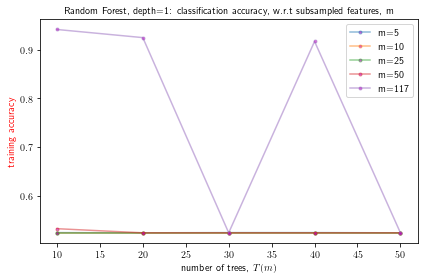

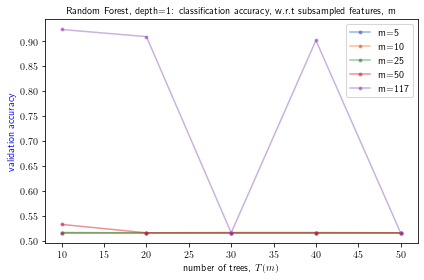

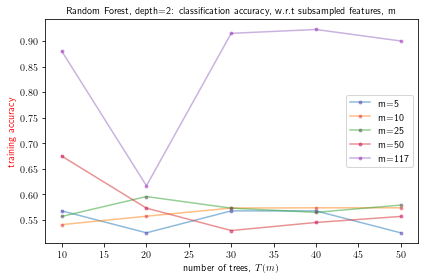

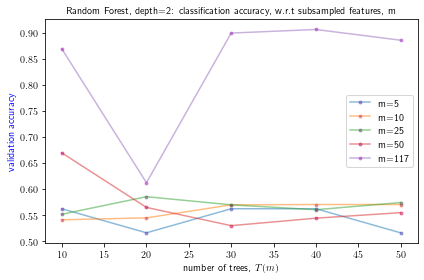

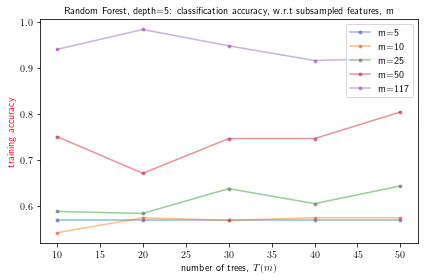

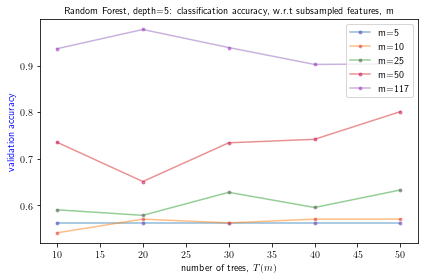

In [48]:
# Plots
print('Random Forest Varying Max-Depth Plot...\t')

x_T = []
x_m = []
y_trainacc = []
y_devacc = []

forestsd = mdlforests['forest']
ds = mdlforests['d']
for mdls_d,d in zip(forestsd,ds):
    forestsm = mdls_d['forest']
    ms = mdls_d['m']
    fig1, ax1 = plt.subplots(figsize=(6, 4), tight_layout=True)
    fig2, ax2 = plt.subplots(figsize=(6, 4), tight_layout=True)
    for mdls_m,m in zip(forestsm,ms):
        x_T = mdls_m['T']
        y_trainacc = mdls_m['facc_train']
        y_devacc = mdls_m['facc_dev']
        #
        ax1.plot(x_T, y_trainacc, marker='.', markerfacecolor='m', alpha=0.5,label=f"m={m}")
        ax1.set_ylabel(f'training accuracy', color='r')
        ax1.set_xlabel(f"number of trees, $T(m)$")
        ax1.legend(loc=0)
        # 
        ax2.plot(x_T, y_devacc, marker='.', markerfacecolor='m', alpha=0.5,label=f"m={m}")
        ax2.set_ylabel(f'validation accuracy', color='b')
        ax2.set_xlabel(f"number of trees, $T(m)$")
        ax2.legend(loc=0)
    ax1.set_title(f"Random Forest, depth={d}: classification accuracy, w.r.t subsampled features, m",color='k', weight='bold', size=10)
    ax2.set_title(f"Random Forest, depth={d}: classification accuracy, w.r.t subsampled features, m",color='k', weight='bold', size=10)
    # plt.ion
    fig1.savefig(figs_dir + f"figforest_{d}_pt2_train.pdf", bbox_inches='tight')
    fig2.savefig(figs_dir + f"figforest_{d}_pt2_dev.pdf", bbox_inches='tight')


print('Done.\n')


In [49]:
x = sample_population(10, 10,withreplace=True)
print(x)
x.shape[0]
x.shape


[4 3 3 6 7 0 7 0 5 4]


(10,)